# Football HOF Analysis
###### CSCE 313:500


Dylan Lowry, Justin (Jun Suk) Yoo, and Quinn Armstrong




---






## Overview and Motivation

#### **Purpose**
Our motivation behind quarterback analysis is to provide meaningful representations of
what a Hall of Fame quarterback in the making looks like. Through the use of
visualizations and machine learning models, we will be able to break down the skill set
of a current NFL quarterback and analyze their statistics in comparison to Hall of Fame
quarterbacks.

#### **Who needs this information?**
With our analysis of quarterbacks, analysts will be able to determine how talented a
quarterback is in comparison to Hall of Fame quarterbacks. Analysts, coaches, players,
and fans alike will all be able to get a solid understanding of a quarterback’s skill set by
observing different statistics and comparing them to the Hall of Fame quarterback
average.

#### **Who would benefit from our analysis?**
The relationships we find between current NFL quarterbacks and Hall of Fame
quarterbacks will be very useful to both coaches and players. They will be able to
observe our findings for better understanding of which specific areas of a player’s game
needs improvement. Not only will they see useful stats, but also a meaningful
comparison to the quarterbacks who made it to the Hall of Fame for players to
understand if they are Hall of Fame worthy or not. Additionally, people that participate in sports betting will be able to better analyze a player's potential before placing a bet, and therefore decrease misinformed decisions.

## Related Work

Sports analytics has and al

## Initial Questions

Our initial question was fairly simple: 

*   **Which Quarterbacks are able to join the Hall of Fame?**


However, as we began to break down the problem, we realized that there are many more opportunities available with this data.

In order to classify a QB as HOF material, we would need to first select which game statistics (Passing Yards, Interceptions, etc) are the most important. This led use to ask more questions like:

*   **Which game stat best predicts a HOF QB?**
*   **Are there any interesting correlations between game stats?**
*   **Given a QB, can we compare them to HOF QB's and their stats?**
*   **Are some QBs similar to others in terms of their stats?**



Lastly, we wanted to dive a little deeper into our analysis. What more could we derive from our data?


*   **Can we cluster similar Qbs into groups?**





## Data

Our first step is to identify which dataset we need to predict a HOF QB. We decided to go with https://www.pro-football-reference.com/hof/hofm_QB.htm because it not only provides basic game stats for every QB, but it also highlights which QBs are already HOF.

In the next cell we will begin to clean and place the data into a pandas dataframe.

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

# retreive and parse data needed for analysis
life_stats = pd.read_csv('Basic_Stats.csv')
qb_game_stats = pd.read_csv('HOFQB.csv')

# the game stats dataset has a "\........" token after every players' name so we need to remove that
print(qb_game_stats.head())
player_name = qb_game_stats['Player']

for i, player in enumerate(player_name):
  player = player[0:-9]
  player_name[i] = player

qb_game_stats['Player'] = player_name
print(qb_game_stats.head())

# the game stats dataset also has irrelevant columns that determine the worth of a qb
# we have decided to get rid of those columns leaving us with only the following:
# ['Player', 'Chmp', 'AP1', 'PB', 'St', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int']
qb_game_stats = qb_game_stats.drop(columns=['From', 'To', 'CarAV', 'G', 'Lng', 'Sk', 'Yds.1'])
print(qb_game_stats.head())



                    Player  Chmp  AP1  PB  St  ...   TD  Lng  Int     Sk   Yds.1
0  Peyton Manning\MannPe00     2    7  14  17  ...  539   86  251  303.0  1953.0
1       Tom Brady\BradTo00     6    3  14  18  ...  559   99  183  508.0  3176.0
2     Brett Favre\FavrBr00     1    3  11  19  ...  508   99  336  525.0  3487.0
3   Johnny Unitas\UnitJo00     3    5  10  14  ...  290   89  253   74.0   590.0
4     Joe Montana\MontJo01     4    3   8  12  ...  273   96  139  313.0  2095.0

[5 rows x 18 columns]
           Player  Chmp  AP1  PB  St  From  ...    Yds   TD  Lng  Int     Sk   Yds.1
0  Peyton Manning     2    7  14  17  1998  ...  71940  539   86  251  303.0  1953.0
1       Tom Brady     6    3  14  18  2000  ...  76481  559   99  183  508.0  3176.0
2     Brett Favre     1    3  11  19  1991  ...  71838  508   99  336  525.0  3487.0
3   Johnny Unitas     3    5  10  14  1956  ...  40239  290   89  253   74.0   590.0
4     Joe Montana     4    3   8  12  1979  ...  40551  273   96  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Processing Data

Now that we have properly cleaned and stored our dataset, we will begin to process our data. We first create a dataframe of only HOF QBs separate from the total QB dataframe. We did this too get the average stats for all HOF QBs for us to later compare with non-HOF QBs. We then append a HOF value to each QB, indicating if that player is in the HOF.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Start processing the data
# the current quarterbacks in the hall of fame
hof_qb = ['Jim Kelly', 'Troy Aikman', 'Len Dawson', 'Warren Moon', 'Bob Griese', 'Sonny Jurgensen', 'Joe Namath', 'Ken Stabler', 'Kurt Warner', 'Dan Fouts', 'Roger Staubach', 'Terry Bradshaw', 'Bart Starr', 'Steve Young', 'Dan Marino', 'Fran Tarkenton', 'John Elway', 'Joe Montana', 'Johnny Unitas', 'Brett Favre']

# make dataframe of only hall of fame players
hof_game_stats = qb_game_stats

for i, player in enumerate(hof_game_stats['Player']):
  if player not in hof_qb:
    hof_game_stats = hof_game_stats.drop(i)
  
print(hof_game_stats.head())

# get all the average stats of hall of fame players
average_hof_stats = hof_game_stats.mean(axis=0)
for i, stat in enumerate(average_hof_stats):
  average_hof_stats[i] = round(stat)

print(average_hof_stats)

# Add HOF col to all Qbs (indicate if Qb is HOF or not), will be used during LASSO
hof_col = []
for i, player in enumerate(qb_game_stats['Player']):
  if player in hof_qb:
    hof_col.append(1)
  else:
    hof_col.append(0)

qb_game_stats['HOF'] = hof_col
print(qb_game_stats.head())

# Clean Null Values *if we use these columns
# qb_game_stats['Sk'] = qb_game_stats['Sk'].fillna(0)
# qb_game_stats['Yds.1'] = qb_game_stats['Yds.1'].fillna(0)

           Player  Chmp  AP1  PB  St   GS   Cmp    Att    Yds   TD  Int
2     Brett Favre     1    3  11  19  298  6300  10169  71838  508  336
3   Johnny Unitas     3    5  10  14  185  2830   5186  40239  290  253
4     Joe Montana     4    3   8  12  164  3409   5391  40551  273  139
7      John Elway     2    0   9  16  231  4123   7250  51475  300  226
8  Fran Tarkenton     0    1   9  18  239  3686   6467  47003  342  266
Chmp        2.0
AP1         2.0
PB          7.0
St         13.0
GS        174.0
Cmp      2994.0
Att      5098.0
Yds     37787.0
TD        254.0
Int       197.0
dtype: float64
           Player  Chmp  AP1  PB  St   GS   Cmp    Att    Yds   TD  Int  HOF
0  Peyton Manning     2    7  14  17  265  6125   9380  71940  539  251    0
1       Tom Brady     6    3  14  18  290  6553  10256  76481  559  183    0
2     Brett Favre     1    3  11  19  298  6300  10169  71838  508  336    1
3   Johnny Unitas     3    5  10  14  185  2830   5186  40239  290  253    1
4     Jo

## Exploratory Analysis

Now that we have all of our data stored and processed, we will begin our analysis using supervised and unsupervised KNN, and clustering. We first take in a QB as input and then use an unsupervised KNN to locate the 2 nearest QBs stats wise. This allows for us to compare QBs of similar stats and potentially identify future HOF QBs. Likewise, we also use a supervised KNN model to predict if the given quarterback should be in the HOF.

Towards the end we also wanted to compare different K values used in our KNN model to find which K produced the most accurate results. We also plotted a heat map of all of the game stats to highlight any interesting correlations between them. Doing this will help us identify key stats for Hall of Fame and Superbowl QBs.

Enter the quarterback name: Tom Brady

***************************
The first quarterback is the one you chose, the next quarterbacks are ones that have similar stats to yours.

CHOSEN QBS:  [[1, 6, 0]]
Player    Tom Brady
Chmp              6
AP1               3
PB               14
St               18
GS              290
Cmp            6553
Att           10256
Yds           76481
TD              559
Int             183
HOF               0
Name: 1, dtype: object
Player    Drew Brees
Chmp               1
AP1                1
PB                13
St                18
GS               280
Cmp             7021
Att            10373
Yds            79034
TD               558
Int              240
HOF                0
Name: 6, dtype: object
Player    Peyton Manning
Chmp                   2
AP1                    7
PB                    14
St                    17
GS                   265
Cmp                 6125
Att                 9380
Yds                71940
TD                   539
Int       

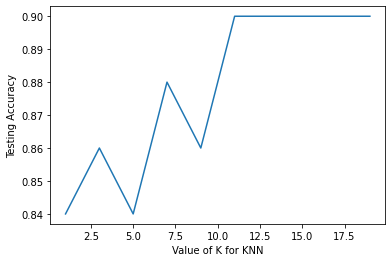

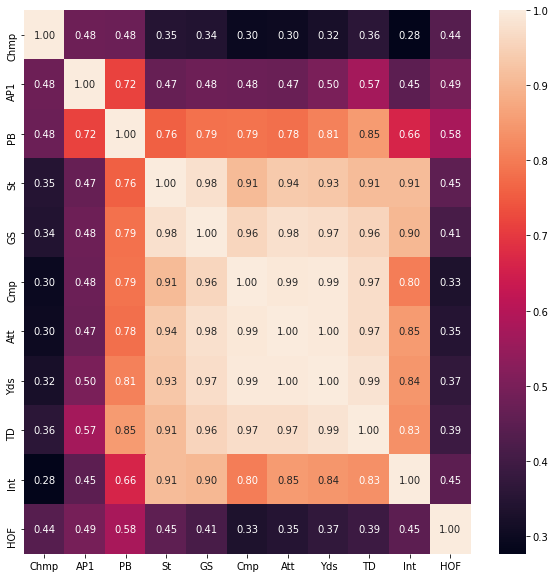

In [ ]:
# USE KNN MODEL HERE
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors

# get the stats of a certain quarterback for the knn algorithm
def which_qb(df):
  qb = input("Enter the quarterback name: ")

  stats = df.loc[df['Player'] == qb].values.tolist()
  stats[0] = stats[0][1:-1] # filter out player and hof column
  return stats

# print the stats of given quarterbacks
def show_qb(df, qbs):
  qbs_stats = qbs.tolist()
  print("CHOSEN QBS: ", qbs_stats)
  for i, qb in enumerate(qbs[0]):
    print(df.iloc[qb])


df = qb_game_stats
params = ['Chmp', 'AP1', 'PB', 'St', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int']

X = df[params]
y = df['HOF']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN model with cross validation of 5 folds just for validation purposes
knn_cv = neighbors.KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
# print(cv_scores)

chosen_qb = which_qb(df)
n_neighbors = 3

# ********************** #
# find k neighbors of a hall of famer to generate QB's who are similar
# using unsupervised KNN model to better predict similar quarterbacks
all_qbs = X.values.tolist()
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(all_qbs)

closest_qbs = neigh.kneighbors(chosen_qb, return_distance=False)

print()
print("***************************")
print("The first quarterback is the one you chose, the next quarterbacks are ones that have similar stats to yours.")
print()
show_qb(df, closest_qbs)
print("***************************")

# ********************** #
# feed a quarterback into our HOF guessing model and then compare their stats to average
# hall of famer stats

# using supervised KNN model to predict if a given quarterback should be in the HOF
n_neighbors = 12
clf1 = neighbors.KNeighborsClassifier(n_neighbors, metric = 'euclidean')
clf1.fit(X_train, y_train)
labels = clf1.predict(X_test)
HOF_prediction = clf1.predict(chosen_qb)

print()
print("***************************")
if HOF_prediction[0] == 0:
  print("This quarterback is not in the hall of fame.")
else:
  print("This quarterback is in the hall of fame.")

print("Here is your given quarterback's stats: ")
print(chosen_qb)
print()
print("Here are the average hall of fame stats: ")
print(average_hof_stats)
print("***************************")

# determine which K value will produce the best results on average
scores = []
k = 1
while k <= 19:
    clf = neighbors.KNeighborsClassifier(k, metric = 'euclidean')
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)
    scores.append(accuracy)
    k = k + 2
    
print("K value Testing accuracies: ", scores)
print()

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

# plot the heat map that shows correlation between features
rcParams['figure.figsize'] = 10, 10
fig = plt.figure()
sns.heatmap(qb_game_stats.corr(), annot=True, fmt=".2f")
plt.show()



From the Heat Map we can see a few interesting correlations. We see that Interceptions play a very large role in determing a Superbowl winning QB, specifically that they tend to have a small amount of interceptions. We also see a strong correlation betwen HOF QBs and amount of Pro Bowl games attended. The more Pro Bowls a QB is invited to and participates in, the more likely that QB will end up in the HOF. Another thing to note is that HOF QBs have a higher correlation with every game stat than Super Bowl Champion QBS do, signifying the higher importance of stats when declaring a QB HOF as compared to Superbowl winner.

                 Chmp       AP1        PB        St        GS       Cmp  \
Dimension 1  0.152225  0.218116  0.311578  0.342646  0.351642  0.346007   
Dimension 2  0.697766  0.563950  0.262803 -0.126987 -0.136960 -0.148836   

                  Att       Yds        TD       Int  
Dimension 1  0.349961  0.352151  0.352515  0.317243  
Dimension 2 -0.162239 -0.126680 -0.048654 -0.155709  
PCA variance: [0.77566    0.11559868]


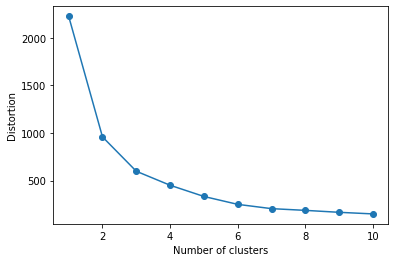

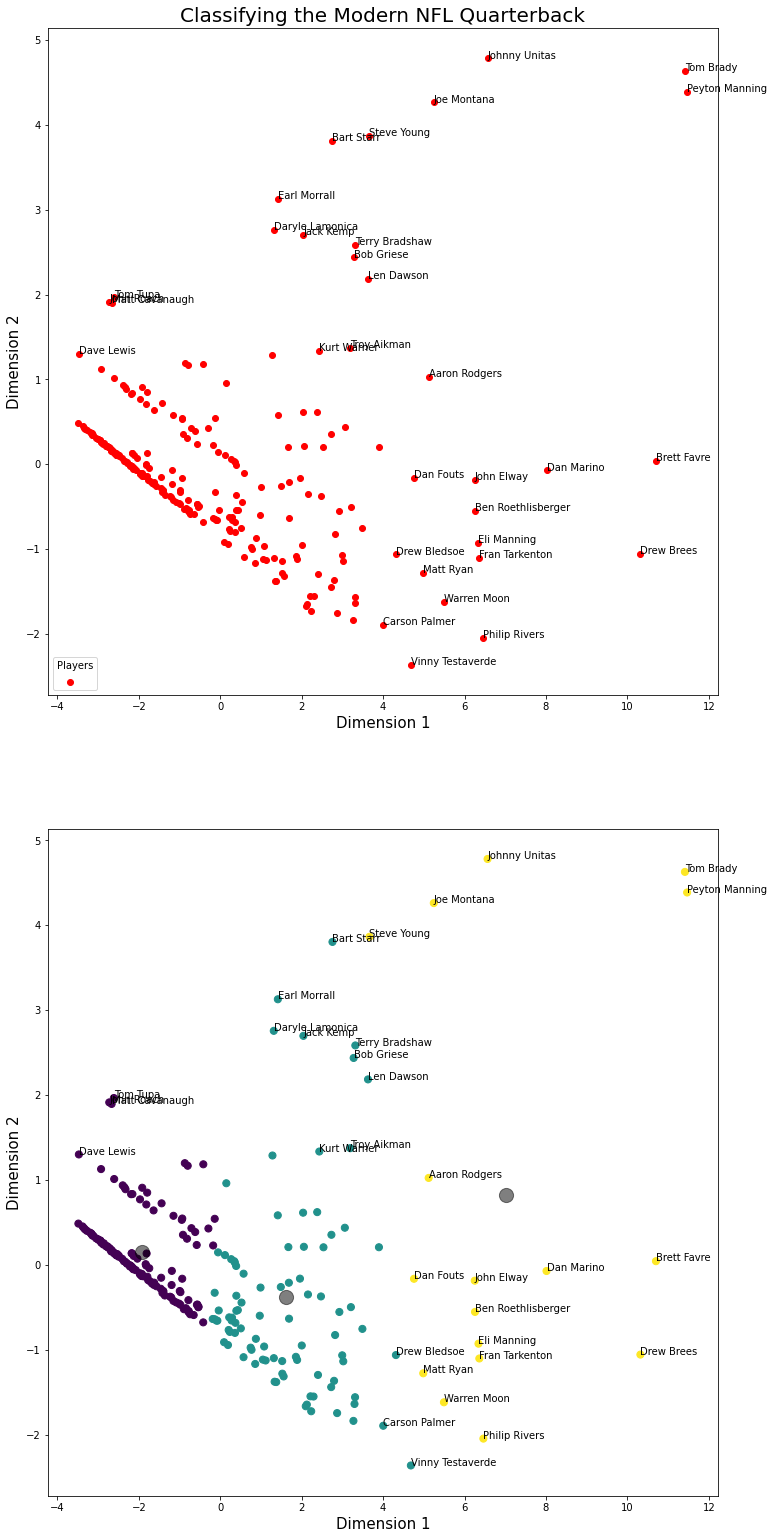

In [ ]:
# CLUSTERING MODEL HERE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
pd.set_option('max_columns', None)  # allowing all columns to be shown when printing a DataFrame

# <<<<< APPLYING PCA TO DATA >>>>>
# NOTE: remember that going from a higher dimension into lower dimensions will cause a loss of information in some way.
# if the first two compenents' explained variance take up less than 85%, it's probably a bad idea to declare that your new data is accurate
# standardizing variables to be on the same scale before applying Principle Component Analysis
df = qb_game_stats
features = ['Chmp', 'AP1', 'PB', 'St', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int'] # Yds.1 is Yds lost due to sack

# separating out features
X = df.loc[:, features].values

# # --------------------
# # testing clustering without dimension reduction
# print(df.loc[:, features])
# kmeans = KMeans(n_clusters = 3, random_state=1).fit(df.loc[:, features])
# print("Centers:")
# print(kmeans.cluster_centers_)
# # end testing clustering without dimension reduction
# # --------------------

# separating out target
Y = df.loc[:, 'Player'].values

# standardizing features
X = StandardScaler().fit_transform(X)

# applying PCA for 2 dimensions and creating new DF with principal features
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Dimension 1', 'Dimension 2'])

featuresDf = pd.DataFrame(pca.components_, columns=features, index=['Dimension 1', 'Dimension 2'])
print(featuresDf.head(5))

# testing variance for dataset
pcaOut = PCA(n_components = 2).fit(X)
print("PCA variance: " + str(pcaOut.explained_variance_ratio_))

# adding Players column to DF
finalDf = pd.concat([principalDf, df[['Player']]], axis = 1)


# <<<<< DETERMINING THE BEST CLUSTER AMOUNT >>>>>
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(finalDf.loc[:, ['Dimension 1', 'Dimension 2']])
    distortions.append(km.inertia_)

# best k-amount test
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# <<<<< CLUSTERING >>>>>
kmeans = KMeans(n_clusters = 3, random_state=1).fit(finalDf.loc[:, ['Dimension 1', 'Dimension 2']])
y_kmeans = kmeans.predict(finalDf.loc[:, ['Dimension 1', 'Dimension 2']])
centers = kmeans.cluster_centers_

# <<<<< PLOTTING >>>>>
plt.figure(1, figsize=(12,27))

# plot of players before clustering
plt.subplot(211)
plt.scatter(finalDf.loc[:, 'Dimension 1'], finalDf.loc[:, 'Dimension 2'], c = 'r')
plt.title('Classifying the Modern NFL Quarterback', fontsize=20)
plt.xlabel('Dimension 1', fontsize=15)
plt.ylabel('Dimension 2', fontsize=15)
plt.legend(' ', title='Players', loc = "lower left")
for i in finalDf.index: # adding player names
  if(finalDf.iloc[i,0] >= 4 or finalDf.iloc[i,1] >= 1.3):
    plt.annotate(finalDf.iloc[i, 2], (finalDf.iloc[i, 0], finalDf.iloc[i, 1]))

# plot of players after clustering
plt.subplot(212)
plt.scatter(finalDf.loc[:, 'Dimension 1'], finalDf.loc[:, 'Dimension 2'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('Dimension 1', fontsize=15)
plt.ylabel('Dimension 2', fontsize=15)
# plt.legend(' ', title='Players', loc = "lower left")  # add colors of clusters along with their player-type label
for i in finalDf.index: # adding player names
  if(finalDf.iloc[i,0] >= 4 or finalDf.iloc[i,1] >= 1.3):
    plt.annotate(finalDf.iloc[i, 2], (finalDf.iloc[i, 0], finalDf.iloc[i, 1]))

## Final Analysis

After obtaining the results of our models using our QB data, we were able to discover a few different findings. We believe our initial research questions were answered and have retrieved insight that opens the doors to even further research.

Starting off with our supervised and unsupervised KNN models, we were able to dig deep into the important qualitites that make a great quarterback. The unsupervised KNN model is what we used to determine QBs who are similar to the QB that was fed to the model. Depending on the value of 'k', the model would spit out 'k' QBs who had stats similar to the given QB, or the 'k' nearest neighbors. This model was easy to validate because we simply looked at all the stats between the QBs, and as expected, they were similar. The main goal of this model is to provide quality insight to the skill level a QB is currently at. If we were to hypothetically feed in 'Dak Prescott' into our model, and a produced similar QB happened to be in the Hall of Fame, we get an idea that Dak Prescott has had a pretty successful career so far and can observe the similarities/differences in stats between these produced QBs.

The supervised KNN model was much more direct, and its sole purpose was for stat analysis and to find any HOF qualities the QB might have. To get a result, the model would again take in a QB or a set of stats, and classify whether they should be in the HOF. This model was slightly more challenging to work with because our dataset was not that big and there are not that many QBs in general that are in the HOF. Both of these obstacles have to do with the nature of the NFL, but there was some positive results nonetheless. If our model believed a QB should be in the Hall of Fame, it is because the given QB probably had really good stats implying a successful career. If our model believed a QB should not be in the HOF, we conveniently displayed the given QBs stats with the HOF QB average stats for analysts to understand which part of the QB's game is prevailing or lacking. To validate and justify the model was producing accurate results, we used two methods. The first method involved a 5-fold cross validation on our data, and the second involved running the algorithm repeatedly for values of 'k' ranging from 1-19.

Both models generated useful results, and the last thing we did to further analyze what makes a HOF QB was create a heatmap that shows the correlations between the different stats. This heatmap highlighted the most important stats that determined a Hall of Famer, and other correlations the stats had between themselves.

The clustering model gave us a better interpretation of the quarterbacks and their potential of making it to the Hall of Fame. 

We first standardized our data in our QB dataset in order to get a leveled scale to compare the data values to one another. This was important because a difference in the scale of values could have one feature dominate the results of the Principal Component Analysis we will apply. After running a PCA on the data looking for 2 compenents, we were able to get 1 dimension that represented standard statistics on a QB like the number of games started and the number of passed completed, and a second dimension that represented specialized statistics like the number of Super Bowls won and the number of First-team All-Pro nominations.

After all the preprocessing, we finally ran our data through a k-means clustering model for 3 clusters, which we chose to use after finding the optimal number of clusters using the elbow method. The clusters represented the following groups: Players with low statistical values and had less potential to make the HOF compared to other players; players with more developed skills and a higher potential to make the HOF; players with high skill levels who are either already inducted into the HOF or are very promising candidates & may even be guaranteed to get in.



## Presentation? 

For a concise, visually appealing summary of the work we produced with this project, you can take a look at our presentation.

https://docs.google.com/presentation/d/18gj8XdR7OhVxN0gJdYcG900O_tiwJ97s3NtSqdaA3-4/edit?usp=sharing